<a href="https://colab.research.google.com/github/ChucNguyen2k2/learnpy/blob/main/Bu%E1%BB%95i_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
file_path = '/content/vietnamese_tiki_products_women_shoes.csv'
data = pd.read_csv(file_path)

In [2]:
print(data.head())

   Unnamed: 0         id                                               name  \
0           0  252071637  Hộp dép, hộp đựng dép hm - màu cam kich thước ...   
1           1  208439152  Dép xốp quai ngang đi trong nhà- dép xốp khách...   
2           2  105883794                             dép tổ ông huyền thoại   
3           3  252864898                      Sen guốc trơn lá lớn_Ảnh thật   
4           4  252865522                                  Cây guốc sao trơn   

                                         description  original_price  price  \
0         Hộp dép, hộp đựng dép hm - màu cam, kíc...            3000   3000   
1    Dép xốp quai ngang, đi trong nhà/Khách sạn/Đ...           14200  14200   
2  Thiết kế đặc biệtChống trơn trượtKhông ngậm nư...            9900   9900   
3         Chào bạn, cảm ơn bạn đã ghé thăm shop ạ...           15000  15000   
4         Cây hawothia guốc sao trơn cây đang con...           13000  13000   

  fulfillment_type brand  review_count  rating_ave

In [3]:
# Kiểm tra thông tin tổng quan về dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5919 entries, 0 to 5918
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5919 non-null   int64  
 1   id                5919 non-null   int64  
 2   name              5919 non-null   object 
 3   description       5919 non-null   object 
 4   original_price    5919 non-null   int64  
 5   price             5919 non-null   int64  
 6   fulfillment_type  5919 non-null   object 
 7   brand             5919 non-null   object 
 8   review_count      5919 non-null   int64  
 9   rating_average    5919 non-null   float64
 10  favourite_count   5919 non-null   int64  
 11  pay_later         5919 non-null   bool   
 12  current_seller    5919 non-null   object 
 13  date_created      5919 non-null   int64  
 14  number_of_images  5919 non-null   int64  
 15  vnd_cashback      5919 non-null   int64  
 16  has_video         5919 non-null   bool   


In [4]:
# Kiểm tra số lượng dữ liệu bị thiếu
print(data.isnull().sum())

Unnamed: 0          0
id                  0
name                0
description         0
original_price      0
price               0
fulfillment_type    0
brand               0
review_count        0
rating_average      0
favourite_count     0
pay_later           0
current_seller      0
date_created        0
number_of_images    0
vnd_cashback        0
has_video           0
category            0
quantity_sold       0
dtype: int64


In [5]:
# Kiểm tra và loại bỏ các ký tự không cần thiết trong cột giá (nếu có)
if 'price' in data.columns:
    data['price'] = data['price'].replace('[^\d]', '', regex=True).astype(float)
print(data['price'].describe())

count    5.919000e+03
mean     2.841618e+05
std      5.067012e+05
min      1.000000e+03
25%      6.387500e+04
50%      1.580000e+05
75%      2.900000e+05
max      5.500000e+06
Name: price, dtype: float64


In [6]:
print(data.describe())

# Nhóm dữ liệu theo loại sản phẩm
if 'category' in data.columns:
    category_summary = data.groupby('category')['price'].mean()
    print(category_summary)

        Unnamed: 0            id  original_price         price  review_count  \
count  5919.000000  5.919000e+03    5.919000e+03  5.919000e+03   5919.000000   
mean   2959.000000  1.509513e+08    3.218696e+05  2.841618e+05      3.898294   
std    1708.812453  6.495821e+07    5.582770e+05  5.067012e+05     17.924171   
min       0.000000  1.599010e+05    1.000000e+03  1.000000e+03      0.000000   
25%    1479.500000  1.033231e+08    6.500000e+04  6.387500e+04      0.000000   
50%    2959.000000  1.615611e+08    1.650000e+05  1.580000e+05      0.000000   
75%    4438.500000  1.978585e+08    3.800000e+05  2.900000e+05      2.000000   
max    5918.000000  2.631170e+08    5.500000e+06  5.500000e+06    582.000000   

       rating_average  favourite_count  date_created  number_of_images  \
count     5919.000000           5919.0   5919.000000       5919.000000   
mean         1.635192              0.0    636.506167          6.155770   
std          2.187471              0.0    387.445574     

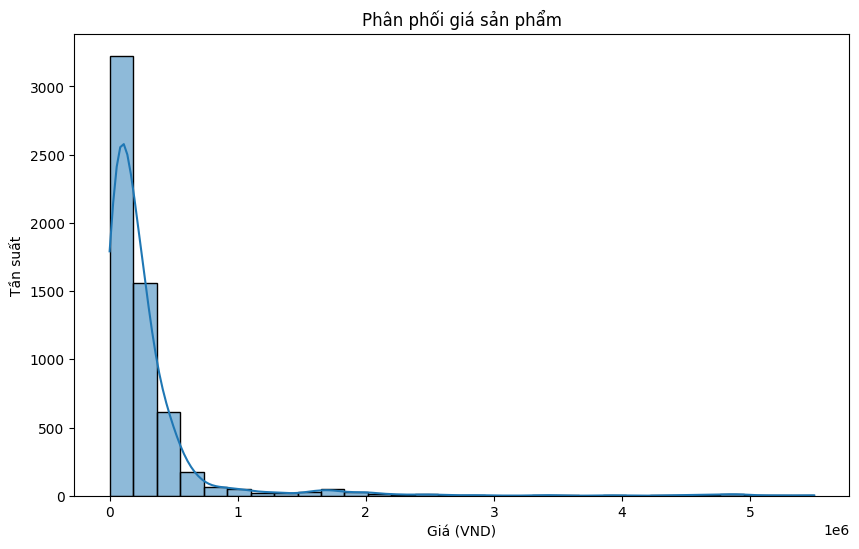

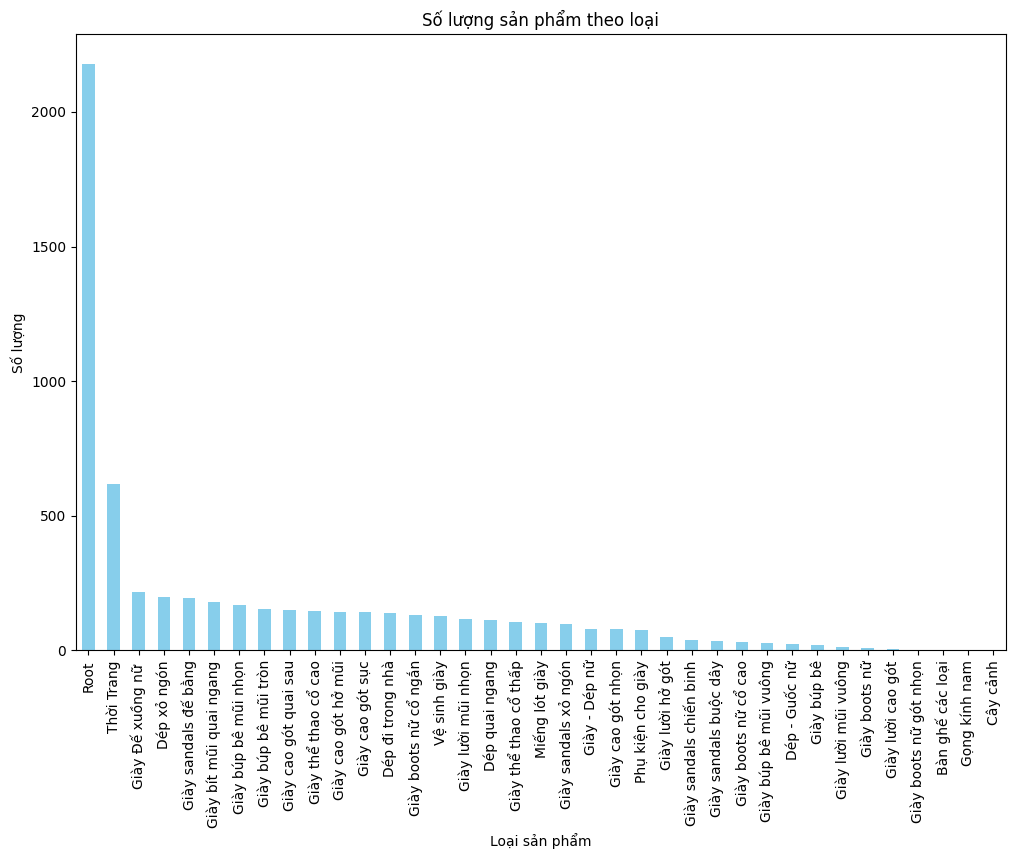

In [8]:

# Biểu đồ phân phối giá sản phẩm
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Phân phối giá sản phẩm')
plt.xlabel('Giá (VND)')
plt.ylabel('Tần suất')
plt.show()

# Biểu đồ cột cho số lượng sản phẩm theo loại
if 'category' in data.columns:
    plt.figure(figsize=(12, 8))
    data['category'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Số lượng sản phẩm theo loại')
    plt.xlabel('Loại sản phẩm')
    plt.ylabel('Số lượng')
    plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Giả sử dữ liệu có cột 'rating_count' làm biến độc lập và 'price' làm biến phụ thuộc
if 'rating_count' in data.columns and 'price' in data.columns:
    X = data[['rating_count']].dropna()
    y = data['price'].dropna()

    # Chia tập dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Xây dựng mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Hiển thị kết quả mô hình
    print(f"Hệ số hồi quy: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")

    # Trực quan hóa kết quả
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Dữ liệu thật')
    plt.plot(X_test, y_pred, color='red', label='Dự đoán')
    plt.title('Hồi quy tuyến tính - Giá và Số lượng đánh giá')
    plt.xlabel('Số lượng đánh giá')
    plt.ylabel('Giá (VND)')
    plt.legend()
    plt.show()


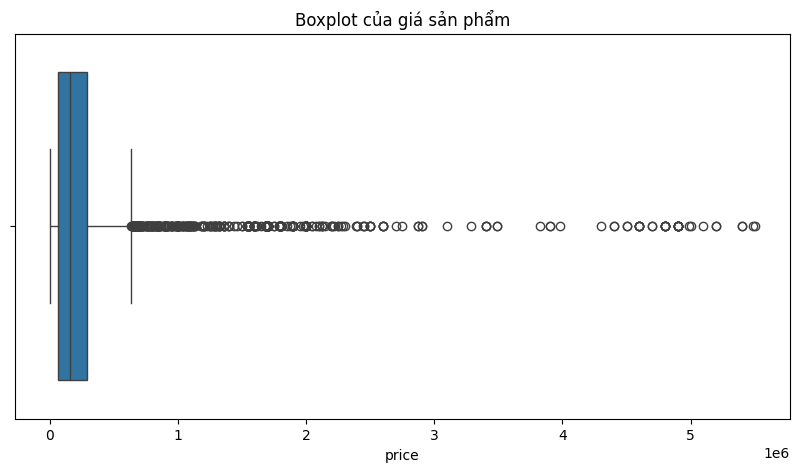

In [12]:
# Kiểm tra phân phối giá và số lượng đánh giá
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['price'])
plt.title('Boxplot của giá sản phẩm')
plt.show()

if 'rating_count' in data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data['rating_count'])
    plt.title('Boxplot của số lượng đánh giá')
    plt.show()

# Kiểm tra mối quan hệ giữa giá và đánh giá
if 'price' in data.columns and 'rating_count' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rating_count', y='price', data=data)
    plt.title('Mối quan hệ giữa số lượng đánh giá và giá')
    plt.xlabel('Số lượng đánh giá')
    plt.ylabel('Giá (VND)')
    plt.show()


In [14]:
# Nếu có cột thời gian, kiểm tra xu hướng giá theo thời gian
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    time_analysis = data.groupby(data['date'].dt.to_period('M')).agg({
        'price': 'mean',
        'rating_count': 'sum'
    })

    # Trực quan hóa xu hướng giá theo thời gian
    time_analysis['price'].plot(figsize=(12, 6), marker='o', linestyle='-')
    plt.title('Xu hướng giá theo thời gian')
    plt.xlabel('Thời gian (Tháng)')
    plt.ylabel('Giá trung bình (VND)')
    plt.grid()
    plt.show()


In [15]:
# Tóm tắt các thông tin quan trọng
print("Sản phẩm đắt nhất:")
print(data.loc[data['price'].idxmax()])

print("\nSản phẩm rẻ nhất:")
print(data.loc[data['price'].idxmin()])

if 'rating_count' in data.columns:
    print("\nSản phẩm được đánh giá nhiều nhất:")
    print(data.loc[data['rating_count'].idxmax()])

    print("\nSản phẩm ít được đánh giá nhất:")
    print(data.loc[data['rating_count'].idxmin()])


Sản phẩm đắt nhất:
Unnamed: 0                                                       2223
id                                                          177662952
name                                Giày Boot Nữ GEOX D Bigliana 90 D
description         Giày boots nữ Geox BIGLIANA 90 với kiểu dáng h...
original_price                                                5500000
price                                                       5500000.0
fulfillment_type                                             dropship
brand                                                            GEOX
review_count                                                        0
rating_average                                                    0.0
favourite_count                                                     0
pay_later                                                        True
current_seller                                                  SHOOZ
date_created                                                      501
n

In [16]:
# Kiểm tra kiểu dữ liệu của các cột
print(data.dtypes)


Unnamed: 0            int64
id                    int64
name                 object
description          object
original_price        int64
price               float64
fulfillment_type     object
brand                object
review_count          int64
rating_average      float64
favourite_count       int64
pay_later              bool
current_seller       object
date_created          int64
number_of_images      int64
vnd_cashback          int64
has_video              bool
category             object
quantity_sold         int64
dtype: object


In [17]:
# Lọc các cột số
numerical_data = data.select_dtypes(include=['float64', 'int64'])
print(numerical_data.head())


   Unnamed: 0         id  original_price    price  review_count  \
0           0  252071637            3000   3000.0             0   
1           1  208439152           14200  14200.0             0   
2           2  105883794            9900   9900.0             3   
3           3  252864898           15000  15000.0             0   
4           4  252865522           13000  13000.0             0   

   rating_average  favourite_count  date_created  number_of_images  \
0             0.0                0           149                 7   
1             0.0                0           277                 6   
2             5.0                0           819                 4   
3             0.0                0           139                 1   
4             0.0                0           139                 1   

   vnd_cashback  quantity_sold  
0             0              0  
1             0              0  
2           267              8  
3             0              0  
4          

In [18]:
# Xử lý giá trị thiếu bằng cách điền giá trị trung bình (hoặc phương pháp khác)
numerical_data = numerical_data.fillna(numerical_data.mean())

# Kiểm tra lại dữ liệu sau khi xử lý
print(numerical_data.isnull().sum())


Unnamed: 0          0
id                  0
original_price      0
price               0
review_count        0
rating_average      0
favourite_count     0
date_created        0
number_of_images    0
vnd_cashback        0
quantity_sold       0
dtype: int64


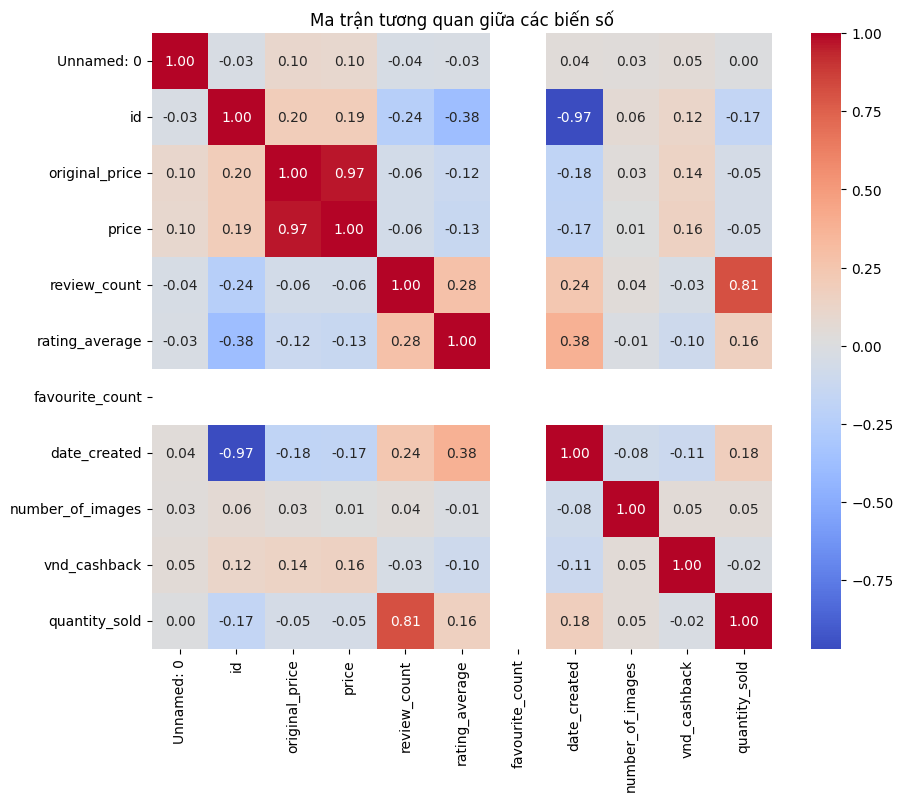

In [19]:
# Tính ma trận tương quan
correlation_matrix = numerical_data.corr()

# Hiển thị ma trận tương quan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()
